<a href="https://colab.research.google.com/github/DivjotBanga/DivjotBanga.github.io/blob/master/instance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import sqlparse

In [2]:
drive.mount('./data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./data


In [0]:
df = pd.read_excel('./data/My Drive/ML_training/SF_Workload_estimation1.0.xlsx')

In [0]:
df['functions'] = df['QUERY_TEXT'].str.findall('[A-Za-z]+\(.+\)')

In [0]:
df['joins'] = df['QUERY_TEXT'].str.findall('\sJOIN\s' )

In [0]:
df['WHERE'] = df['QUERY_TEXT'].str.findall('WHERE')

In [0]:
df['billing'] = df['QUERY_TEXT'].str.findall('billing')

In [0]:
df['purchase'] = df['QUERY_TEXT'].str.findall('purchase')

In [0]:
df['GROUP'] = df['QUERY_TEXT'].str.findall('\sGROUP\sBY\s' )

In [0]:
df['number_of_function'] = df['functions'].str.len()
df['number_of_joins'] = df['joins'].str.len()
df['number_of_WHERE'] = df['WHERE'].str.len()
df['number_of_billing'] = df['billing'].str.len()
df['number_of_purchase'] = df['purchase'].str.len()
df['number_of_GROUP'] = df['GROUP'].str.len()

In [22]:
df

,QUERY_ID,QUERY_TEXT,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,WAREHOUSE_SIZE,QRY_WAREHOUSE_SIZE,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,START_TIME,QRY_END_TIME,QUERY_TAG,QUERY_TYPE,USER_NAME,SESSION_ID,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,Rows_Bucket,INBOUND_DATA_TRANSFER_BYTES,functions,joins,WHERE,billing,purchase,GROUP,number_of_function,number_of_joins,number_of_WHERE,number_of_purchase,number_of_GROUP,number_of_billing
0,018ed8ac-00eb-2a8f-0000-0583001b0b6a,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,549,0.549,979,0.979,2019-09-12 15:36:41.226 -0700,2019-09-12 15:36:42.205 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199609206,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",[],[],[],[],[],1,0,0,0,0,0
1,018ed071-00d0-4c19-0000-05830019b462,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,26524,26.524,29977,29.977,2019-09-11 04:29:55.398 -0700,2019-09-11 04:30:25.375 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199587914,SUCCESS,3.710218e+10,1.000000e+07,NaN,0,"[substring(COMMENT_TXT,1,4000)]",[],[],[],[],[],1,0,0,0,0,0
2,018ef0ef-009d-9251-0000-05830026a0ae,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,572,0.572,1291,1.291,2019-09-16 23:07:52.364 -0700,2019-09-16 23:07:53.655 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199643698,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",[],[],[],[],[],1,0,0,0,0,0
3,018eec94-009f-f0c8-0000-05830024586a,insert into BIZ_USER_DB.TERMINUS_BIZ_APP.its_s...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,35672,35.672,38342,38.342,2019-09-16 04:32:31.730 -0700,2019-09-16 04:33:10.072 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199643666,SUCCESS,1.225716e+11,1.000000e+09,NaN,0,"[substr(REGRANT_ERROR_TXT,1,50)]",[],[],[],[],[],1,0,0,0,0,0
4,018eec53-0039-3c3b-0000-058300244732,insert into BIZ_USER_DB.TERMINUS_BIZ_APP.Its_c...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,4707,4.707,6871,6.871,2019-09-16 03:27:40.613 -0700,2019-09-16 03:27:47.484 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199643666,SUCCESS,1.182197e+09,3.900000e+06,NaN,0,"[substr(NOTES_TXT,1,4000), substr(ADDON_RCPT_S...",[],[WHERE],[],[],[],2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,018ed693-0042-359d-0000-0583001a7be6,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,29,ETL_HIGH_4XL_WH_3,4X-Large,4X-Large,1,554,0.554,1069,1.069,2019-09-12 06:39:10.328 -0700,2019-09-12 06:39:11.397 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199621502,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",[],[],[],[],[],1,0,0,0,0,0
59,018ed68a-0008-72b5-0000-0583001a8bba,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,28,ETL_HIGH_4XL_WH_2,4X-Large,4X-Large,1,133,0.133,704,0.704,2019-09-12 06:30:50.607 -0700,2019-09-12 06:30:51.311 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199609150,SUCCESS,NaN,NaN,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",[],[],[],[],[],1,0,0,0,0,0
60,018ed688-0077-0b71-0000-0583001a7baa,INSERT INTO BIZ_USER_DB.TERMINUS_BIZ_APP.ITS_S...,HIGH,9,28,ETL_HIGH_4XL_WH_2,4X-Large,4X-Large,1,107,0.107,751,0.751,2019-09-12 06:28:35.134 -0700,2019-09-12 06:28:35.885 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199625606,SUCCESS,NaN,NaN,NaN,0,"[COMMENT(Comment_Id, Acct_Id, Admin_User_Id, C...",[],[],[],[],[],1,0,0,0,0,0
61,018ed688-0077-0b71-0000-0583001a7baa,"SELECT Orders.OrderID, Customers.CustomerName,...",HIGH,9,28,ETL_HIGH_4XL_WH_2,4X-Large,4X-Large,1,107,0.107,751,0.751,2019-09-12 06:28:35.134 -0700,2019-09-12 06:28:35.885 -0700,NaN,INSERT,TERMINUS_BIZ_USER,6060199625606,SUCCESS,NaN,NaN,NaN,0,[],[ JOIN ],[],[],[],[],0,1,0,0,0,0


In [0]:
mod_df = df.drop(['QUERY_ID',	'QUERY_TEXT','WAREHOUSE_SIZE'	,'QRY_WAREHOUSE_SIZE','START_TIME','QRY_END_TIME','SESSION_ID','functions','USER_NAME','joins','WHERE','purchase','GROUP','billing'],axis = 1)

In [24]:
mod_df

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TAG,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,Rows_Bucket,INBOUND_DATA_TRANSFER_BYTES,number_of_function,number_of_joins,number_of_WHERE,number_of_purchase,number_of_GROUP,number_of_billing
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,NaN,INSERT,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,1,0,0,0,0,0
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,NaN,INSERT,SUCCESS,3.710218e+10,1.000000e+07,NaN,0,1,0,0,0,0,0
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,NaN,INSERT,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,1,0,0,0,0,0
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,NaN,INSERT,SUCCESS,1.225716e+11,1.000000e+09,NaN,0,1,0,0,0,0,0
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,NaN,INSERT,SUCCESS,1.182197e+09,3.900000e+06,NaN,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,NaN,INSERT,SUCCESS,3.762176e+06,1.000000e+03,NaN,0,1,0,0,0,0,0
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,NaN,INSERT,SUCCESS,NaN,NaN,NaN,0,1,0,0,0,0,0
60,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,107,0.107,751,0.751,NaN,INSERT,SUCCESS,NaN,NaN,NaN,0,1,0,0,0,0,0
61,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,107,0.107,751,0.751,NaN,INSERT,SUCCESS,NaN,NaN,NaN,0,0,1,0,0,0,0


In [0]:
mod_df['EXECUTION_STATUS'] = mod_df[mod_df.EXECUTION_STATUS == 'SUCCESS']

In [26]:
mod_df.drop('EXECUTION_STATUS',axis = 1)

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TAG,QUERY_TYPE,BYTES_SCANNED,ROWS_PRODUCED,Rows_Bucket,INBOUND_DATA_TRANSFER_BYTES,number_of_function,number_of_joins,number_of_WHERE,number_of_purchase,number_of_GROUP,number_of_billing
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,NaN,INSERT,3.762176e+06,1.000000e+03,NaN,0,1,0,0,0,0,0
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,NaN,INSERT,3.710218e+10,1.000000e+07,NaN,0,1,0,0,0,0,0
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,NaN,INSERT,3.762176e+06,1.000000e+03,NaN,0,1,0,0,0,0,0
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,NaN,INSERT,1.225716e+11,1.000000e+09,NaN,0,1,0,0,0,0,0
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,NaN,INSERT,1.182197e+09,3.900000e+06,NaN,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,NaN,INSERT,3.762176e+06,1.000000e+03,NaN,0,1,0,0,0,0,0
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,NaN,INSERT,NaN,NaN,NaN,0,1,0,0,0,0,0
60,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,107,0.107,751,0.751,NaN,INSERT,NaN,NaN,NaN,0,1,0,0,0,0,0
61,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,107,0.107,751,0.751,NaN,INSERT,NaN,NaN,NaN,0,0,1,0,0,0,0


In [27]:
mod_df.isna().sum()

DERIVED_WH                               0
REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)     0
WAREHOUSE_ID                             0
WAREHOUSE_NAME                           0
CLUSTER_NUMBER                           0
EXECUTION_TIME                           0
EXECUTION_SEC                            0
TOTAL_ELAPSED_TIME                       0
TOTAL_ELAPSED_SEC                        0
QUERY_TAG                               62
QUERY_TYPE                               0
EXECUTION_STATUS                         0
BYTES_SCANNED                            7
ROWS_PRODUCED                            7
Rows_Bucket                             63
INBOUND_DATA_TRANSFER_BYTES              0
number_of_function                       0
number_of_joins                          0
number_of_WHERE                          0
number_of_purchase                       0
number_of_GROUP                          0
number_of_billing                        0
dtype: int64

In [0]:
mod_df.drop(['QUERY_TAG',"Rows_Bucket"],axis = 1,inplace=True)

In [29]:
mod_df.isna().sum()

DERIVED_WH                              0
REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)    0
WAREHOUSE_ID                            0
WAREHOUSE_NAME                          0
CLUSTER_NUMBER                          0
EXECUTION_TIME                          0
EXECUTION_SEC                           0
TOTAL_ELAPSED_TIME                      0
TOTAL_ELAPSED_SEC                       0
QUERY_TYPE                              0
EXECUTION_STATUS                        0
BYTES_SCANNED                           7
ROWS_PRODUCED                           7
INBOUND_DATA_TRANSFER_BYTES             0
number_of_function                      0
number_of_joins                         0
number_of_WHERE                         0
number_of_purchase                      0
number_of_GROUP                         0
number_of_billing                       0
dtype: int64

In [0]:
mod_df["BYTES_SCANNED"].fillna(0,inplace=True)

In [0]:
mod_df['ROWS_PRODUCED'].fillna(0,inplace=True)

In [32]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 20 columns):
DERIVED_WH                              63 non-null object
REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)    63 non-null int64
WAREHOUSE_ID                            63 non-null int64
WAREHOUSE_NAME                          63 non-null object
CLUSTER_NUMBER                          63 non-null int64
EXECUTION_TIME                          63 non-null int64
EXECUTION_SEC                           63 non-null float64
TOTAL_ELAPSED_TIME                      63 non-null int64
TOTAL_ELAPSED_SEC                       63 non-null float64
QUERY_TYPE                              63 non-null object
EXECUTION_STATUS                        63 non-null object
BYTES_SCANNED                           63 non-null float64
ROWS_PRODUCED                           63 non-null float64
INBOUND_DATA_TRANSFER_BYTES             63 non-null int64
number_of_function                      63 non-null int64
number_of_joins

In [33]:
mod_df

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,INBOUND_DATA_TRANSFER_BYTES,number_of_function,number_of_joins,number_of_WHERE,number_of_purchase,number_of_GROUP,number_of_billing
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,0,0,0,0,0
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,INSERT,HIGH,3.710218e+10,1.000000e+07,0,1,0,0,0,0,0
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,0,0,0,0,0
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,INSERT,HIGH,1.225716e+11,1.000000e+09,0,1,0,0,0,0,0
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,INSERT,HIGH,1.182197e+09,3.900000e+06,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,0,0,0,0,0
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1,0,0,0,0,0
60,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,107,0.107,751,0.751,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1,0,0,0,0,0
61,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,107,0.107,751,0.751,INSERT,HIGH,0.000000e+00,0.000000e+00,0,0,1,0,0,0,0


In [0]:
d = defaultdict(LabelEncoder)
# Encoding the variable
fit = mod_df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
mod_df = mod_df.apply(lambda x: d[x.name].transform(x))

In [35]:
mod_df

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,INBOUND_DATA_TRANSFER_BYTES,number_of_function,number_of_joins,number_of_WHERE,number_of_purchase,number_of_GROUP,number_of_billing
0,0,0,3,3,0,8,8,6,6,0,0,1,1,0,1,0,0,0,0,0
1,0,0,3,3,0,28,28,27,27,0,0,10,5,0,1,0,0,0,0,0
2,0,0,3,3,0,10,10,10,10,0,0,1,1,0,1,0,0,0,0,0
3,0,0,3,3,0,31,31,30,30,0,0,11,9,0,1,0,0,0,0,0
4,0,0,3,3,0,19,19,17,17,0,0,4,4,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,0,3,3,0,9,9,7,7,0,0,1,1,0,1,0,0,0,0,0
59,0,0,2,2,0,2,2,2,2,0,0,0,0,0,1,0,0,0,0,0
60,0,0,2,2,0,0,0,4,4,0,0,0,0,0,1,0,0,0,0,0
61,0,0,2,2,0,0,0,4,4,0,0,0,0,0,0,1,0,0,0,0


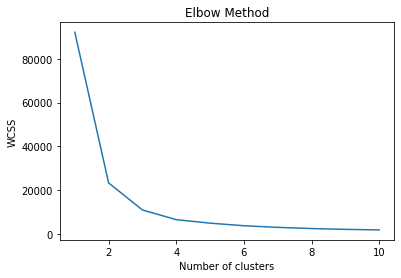

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mod_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(mod_df)

In [0]:
df_trans = fit.apply(lambda x: d[x.name].inverse_transform(x))

In [39]:
df_trans['cluster'] = y_kmeans 
df_trans

,DERIVED_WH,"REGEXP_INSTR(WAREHOUSE_NAME,'_',2,2)",WAREHOUSE_ID,WAREHOUSE_NAME,CLUSTER_NUMBER,EXECUTION_TIME,EXECUTION_SEC,TOTAL_ELAPSED_TIME,TOTAL_ELAPSED_SEC,QUERY_TYPE,EXECUTION_STATUS,BYTES_SCANNED,ROWS_PRODUCED,INBOUND_DATA_TRANSFER_BYTES,number_of_function,number_of_joins,number_of_WHERE,number_of_purchase,number_of_GROUP,number_of_billing,cluster
0,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,549,0.549,979,0.979,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,0,0,0,0,0,0
1,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,26524,26.524,29977,29.977,INSERT,HIGH,3.710218e+10,1.000000e+07,0,1,0,0,0,0,0,1
2,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,572,0.572,1291,1.291,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,0,0,0,0,0,0
3,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,35672,35.672,38342,38.342,INSERT,HIGH,1.225716e+11,1.000000e+09,0,1,0,0,0,0,0,1
4,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,4707,4.707,6871,6.871,INSERT,HIGH,1.182197e+09,3.900000e+06,0,2,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,HIGH,9,29,ETL_HIGH_4XL_WH_3,1,554,0.554,1069,1.069,INSERT,HIGH,3.762176e+06,1.000000e+03,0,1,0,0,0,0,0,0
59,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,133,0.133,704,0.704,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1,0,0,0,0,0,0
60,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,107,0.107,751,0.751,INSERT,HIGH,0.000000e+00,0.000000e+00,0,1,0,0,0,0,0,0
61,HIGH,9,28,ETL_HIGH_4XL_WH_2,1,107,0.107,751,0.751,INSERT,HIGH,0.000000e+00,0.000000e+00,0,0,1,0,0,0,0,0


In [40]:
df_trans['cluster'].value_counts()

0    17
4    12
3    12
2    12
1    10
Name: cluster, dtype: int64

In [0]:
sns.pairplot(df_trans)
plt.show()

In [0]:
corr = df_trans.corr()
plt.subplots(figsize=(20,15))  
sns.heatmap(corr, annot=True)
plt.show()

In [0]:
cor_target = abs(corr["cluster"])
relevant_features = cor_target[cor_target>0.25]
relevant_features

In [0]:
df_trans[['EXECUTION_TIME','EXECUTION_SEC','TOTAL_ELAPSED_TIME','TOTAL_ELAPSED_SEC','BYTES_SCANNED','ROWS_PRODUCED','number_of_function','cluster']].to_excel('./data/My Drive/ML_training/SF_Workload_estimation_final.xlsx')

In [0]:
df_trans.loc[ df_trans.cluster == 0, 'instance_type' ] = 'm1'
df_trans.loc[ df_trans.cluster == 1, 'instance_type' ] = 'max'
df_trans.loc[ df_trans.cluster == 2, 'instance_type' ] = 'min'
df_trans.loc[ df_trans.cluster == 3, 'instance_type' ] = 'm2'
df_trans.loc[ df_trans.cluster == 4, 'instance_type' ] = 'm3'

In [0]:
df_trans